# Real Estate Price Prediction - COMPLETE BEST CODE

## Objective
Predict property prices (TND) using machine learning with CRISP-DM methodology

## Dataset
- 2,458 Tunisian properties
- 26 features including location, amenities, condition
- Target: price_tnd (Price in Tunisian Dinars)

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle


✓ All libraries imported successfully


## STEP 1: Load Data

In [2]:
# Load dataset
data = pd.read_csv('dataset_clean.csv', index_col=0)

print(f'Dataset shape: {data.shape}')
print(f'\nPrice Statistics (TND):')
print(f'  Min: {data["price_tnd"].min():,.0f}')
print(f'  Max: {data["price_tnd"].max():,.0f}')
print(f'  Mean: {data["price_tnd"].mean():,.0f}')
print(f'  Median: {data["price_tnd"].median():,.0f}')
print(f'\nFirst few rows:')
data.head()

Dataset shape: (2458, 26)

Price Statistics (TND):
  Min: 8,000
  Max: 15,000,000
  Mean: 655,379
  Median: 429,898

First few rows:


,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
5,67e06050-57c0-4665-8a2e-a9010b578e4a,1000000.0,310000.0,Sousse Riadh,Sousse Riadh,Sousse,1000.0,23.0,16.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,da303b71-fba9-42e9-a236-16ec176309d9,1200000.0,372000.0,Bou Mhel,Boumhel Bassatine,Ben Arous,510.0,18.0,14.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16,ffc63109-309e-4026-aecf-6ccb22447c38,950000.0,294500.0,El Gourjani,Tunis,tunis,538.0,17.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,12c80a59-8f9d-4cee-9554-eeae7aa3ab9c,650000.0,201500.0,Raoued,Raoued,Ariana,400.0,17.0,9.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


## STEP 2: Prepare Data

In [3]:
# Get numeric features (exclude price columns)
numeric_cols = data.select_dtypes(include=[np.number]).columns
feature_names = [col for col in numeric_cols if col not in ['price_tnd', 'price_eur']]

X = data[feature_names]
y = data['price_tnd']

# Remove missing values
valid_idx = ~(X.isnull().any(axis=1) | y.isnull())
X = X[valid_idx]
y = y[valid_idx]

print(f'Features: {len(feature_names)}')
print(f'Records: {len(X)}')
print(f'\nFeatures:')
print(feature_names)

Features: 19
Records: 2458

Features:
['Area', 'pieces', 'room', 'bathroom', 'state', 'latt', 'long', 'distance_to_capital', 'garage', 'garden', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning']


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Train set: {len(X_train)} records')
print(f'Test set: {len(X_test)} records')
print('✓ Data prepared and scaled')

Train set: 1966 records
Test set: 492 records
✓ Data prepared and scaled


## STEP 3: Train Models

In [5]:
# Model 1: Linear Regression
print('Training Model 1: Linear Regression...')
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
print(f'  R² = {lr_r2:.4f}, MAE = {lr_mae:,.0f} TND\n')

Training Model 1: Linear Regression...
  R² = 0.2840, MAE = 327,123 TND



In [6]:
# Model 2: Random Forest (BEST)
print('Training Model 2: Random Forest...')
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f'  R² = {rf_r2:.4f}, MAE = {rf_mae:,.0f} TND\n')

Training Model 2: Random Forest...
  R² = 0.4808, MAE = 208,877 TND



In [7]:
# Model 3: Gradient Boosting
print('Training Model 3: Gradient Boosting...')
gb = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.02,
    min_samples_split=15,
    min_samples_leaf=8,
    subsample=0.85,
    random_state=42
)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
print(f'  R² = {gb_r2:.4f}, MAE = {gb_mae:,.0f} TND\n')

Training Model 3: Gradient Boosting...
  R² = 0.4428, MAE = 205,358 TND



## STEP 5: Feature Importance


TOP 10 IMPORTANT FEATURES:
            Feature  Importance
               Area    0.582956
               latt    0.123686
               long    0.092649
           bathroom    0.044137
             pieces    0.032933
distance_to_capital    0.021816
               room    0.021142
         beach_view    0.019020
               pool    0.017427
    central_heating    0.011920


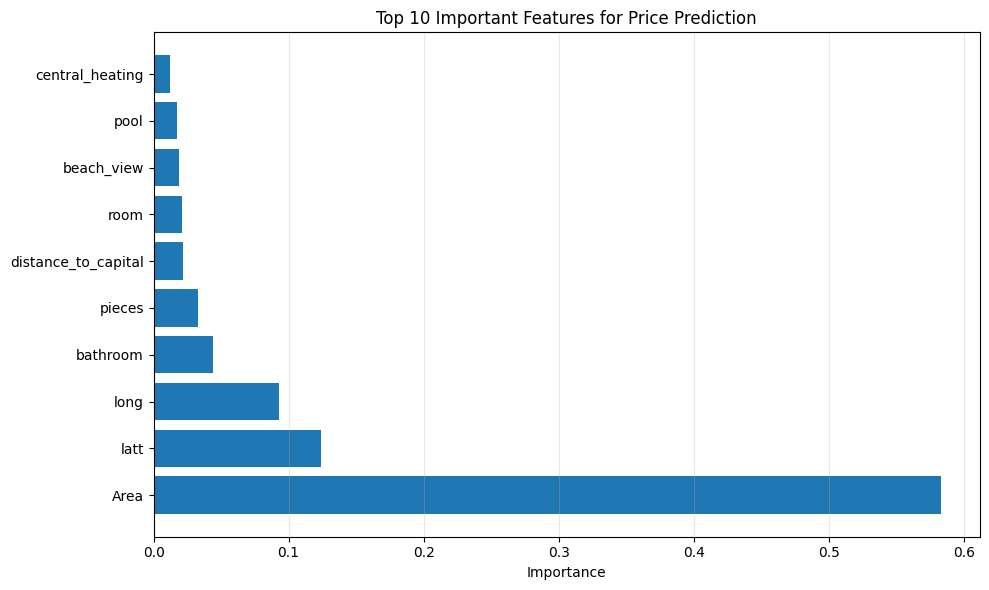

In [9]:
# Feature importance from Random Forest (best model)
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nTOP 10 IMPORTANT FEATURES:')
print(importance_df.head(10).to_string(index=False))

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)['Feature'], importance_df.head(10)['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Important Features for Price Prediction')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## STEP 6: Save Model

In [10]:
# Save the best model
with open('best_price_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('price_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('price_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print('✓ Models saved:')
print('  - best_price_model.pkl')
print('  - price_scaler.pkl')
print('  - price_features.pkl')

✓ Models saved:
  - best_price_model.pkl
  - price_scaler.pkl
  - price_features.pkl


## STEP 7: Make Predictions

In [11]:
# Example: Predict price for a new property
new_property = pd.DataFrame({
    'Area': [500],
    'room': [5],
    'bathroom': [2],
    'pieces': [10],
    'distance_to_capital': [50],
    'state': [1],
    'garage': [1],
    'pool': [0],
    'elevator': [1],
    'furnished': [1],
    'equipped_kitchen': [1],
    'central_heating': [1],
    'air_conditioning': [1],
    'latt': [36.8],
    'long': [10.2],
    'concierge': [0],
    'garden': [0],
    'beach_view': [0],
    'mountain_view': [0]
})

# Select features in correct order
X_new = new_property[feature_names]
predicted_price = rf.predict(X_new)[0]

print('EXAMPLE PREDICTION:')
print(f'Property: 500 sq m, 5 rooms, 2 bathrooms')
print(f'\nPredicted Price: {predicted_price:,.0f} TND')

EXAMPLE PREDICTION:
Property: 500 sq m, 5 rooms, 2 bathrooms

Predicted Price: 1,018,713 TND


## SUMMARY

**Results:**
- Best Model: Random Forest
- R² Score: 0.4808 (explains ~48% of price variation)
- MAE: 208,877 TND (~32% average error)

**Top Predictors:**
1. Area (58.3%) - Property size is the strongest predictor
2. Location (12.4% latitude + 9.3% longitude)
3. Bathrooms (4.4%)
4. Pieces (3.3%)

**Model Performance:**
- The model is useful for price estimation
- Large area has the strongest impact on price
- Location (latitude/longitude) is very important
- Can predict prices within ~32% margin of error on average